<a href="https://www.kaggle.com/code/surobhipal/data-professional-jobs-india-exploratory-analysis?scriptVersionId=150033547" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-jobs-in-india/Data_Science_Jobs_in_India.csv


# 1. Importing and Understanding the Dataset

 Data has become the new and future oil for organizations.
  Data is accumulated with every passing second in order to analyze and provide valuable insights for otimizing a company's growth.
 The demand and scope of data scientist and relevant jobs are rapidly increasing and getting popular all around the world.
 India is the second highest recruiter (The US being in the first position) of employees in the field of data professionals.
 
 The present dataset contains seven columns which holds information of data professional jobs in India including the salaries offered by companies.
 
 Columns detail are as follows:
 
* **company_name:** Name of company offering data professional jobs
* **job_title:** Title of the job role
* **min_experience:** Miniumum experience required for a job role
* **avg_salary:** Annual average salary offered by a company in Lakh Rupees
* **min_salary:** Annual minimum salary offered by a company in Lakh Rupees	
* **max_salary:** Annual maximum salary offered by a company in Lakh Rupees
* **num_of_salaries:** Number of salary reported on various portals by employees

* The very first step towards analysis of a dataset is to import csv file by utilising pandas library and .read_csv() method
* By deploying various methods and attributes, we can retrieve useful information about the dataset for better understanding

In [2]:
#dataset - data-science-jobs-in-india
#Importing and reading csv file
df = pd.read_csv("/kaggle/input/data-science-jobs-in-india/Data_Science_Jobs_in_India.csv")
df

,Unnamed: 0,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
0,0,TCS,Data Scientist,2,7.8L,4.5L,16.0L,841
1,1,Accenture,Data Scientist,2,12.8L,5.8L,23.0L,501
2,2,IBM,Data Scientist,2,13.4L,5.3L,25.0L,394
3,3,Cognizant,Data Scientist,2,9.8L,5.0L,18.0L,318
4,4,Capgemini,Data Scientist,2,8.6L,4.8L,14.6L,300
...,...,...,...,...,...,...,...,...
1597,1597,Collabera Technologies,Data Architect,8,17.0L,12.0L,23.1L,4
1598,1598,Coforge,Data Architect,7,27.1L,18.5L,39.0L,4
1599,1599,Hitachi,Data Architect,21,40.0L,25.0L,50.0L,3
1600,1600,GE Power,Data Architect,7,16.7L,14.9L,19.0L,3


In [3]:
# Checking presence of null values, datatype of each column and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1602 non-null   int64 
 1   company_name     1602 non-null   object
 2   job_title        1602 non-null   object
 3   min_experience   1602 non-null   int64 
 4   avg_salary       1602 non-null   object
 5   min_salary       1602 non-null   object
 6   max_salary       1602 non-null   object
 7   num_of_salaries  1602 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 100.2+ KB


No null values present in the dataset

# 2. Data Cleaning and Preparation

The next vital step is to clean dataset and to prepare it in a readable and comprehensive format.

**Following steps are taken:**

* Checking duplicate records by using duplicated() method
* Dropping unnecessary columns by using drop() method
* Converting column names into title case by using .str.title() method
* Renaming column names by using .rename() method
* Replacing characters using .str.replace() method

In [4]:
# Checking column names
df.columns

Index(['Unnamed: 0', 'company_name', 'job_title', 'min_experience',
       'avg_salary', 'min_salary', 'max_salary', 'num_of_salaries'],
      dtype='object')

In [5]:
# Checking duplicate records
df[df.duplicated()]

,Unnamed: 0,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries


In [6]:
# Dropping column
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [7]:
# Converting column names into title case
df.columns = df.columns.str.title()

In [8]:
# Renaming column names
df.rename(columns = {"Company_Name":"Company","Avg_Salary":"Avg_Salary(Lakh Rs.)","Min_Salary":"Min_Salary(Lakh Rs.)","Max_Salary":"Max_Salary(Lakh Rs.)","Num_Of_Salaries":"Salaries_Reported"},inplace = True, errors ="raise")

In [9]:
# Replacing characters from column values
df["Avg_Salary(Lakh Rs.)"] =df["Avg_Salary(Lakh Rs.)"].str.replace("L","")
df["Min_Salary(Lakh Rs.)"] =df["Min_Salary(Lakh Rs.)"].str.replace("L","")
df["Max_Salary(Lakh Rs.)"] =df["Max_Salary(Lakh Rs.)"].str.replace("L","")

In [10]:
df

,Company,Job_Title,Min_Experience,Avg_Salary(Lakh Rs.),Min_Salary(Lakh Rs.),Max_Salary(Lakh Rs.),Salaries_Reported
0,TCS,Data Scientist,2,7.8,4.5,16.0,841
1,Accenture,Data Scientist,2,12.8,5.8,23.0,501
2,IBM,Data Scientist,2,13.4,5.3,25.0,394
3,Cognizant,Data Scientist,2,9.8,5.0,18.0,318
4,Capgemini,Data Scientist,2,8.6,4.8,14.6,300
...,...,...,...,...,...,...,...
1597,Collabera Technologies,Data Architect,8,17.0,12.0,23.1,4
1598,Coforge,Data Architect,7,27.1,18.5,39.0,4
1599,Hitachi,Data Architect,21,40.0,25.0,50.0,3
1600,GE Power,Data Architect,7,16.7,14.9,19.0,3


# 3. Typecasting

Typecasting is a process of converting one datatype to another appropraite datatype in order to optimize data and reduce memory usage

In [11]:
# Checking types of datatype of each column
df.dtypes

Company                 object
Job_Title               object
Min_Experience           int64
Avg_Salary(Lakh Rs.)    object
Min_Salary(Lakh Rs.)    object
Max_Salary(Lakh Rs.)    object
Salaries_Reported        int64
dtype: object

In [12]:
# Checking number of unique values present in a column
df.Job_Title.nunique()

10

In [13]:
# Deploying astype() method for typecasting
df = df.astype({"Job_Title":"category","Avg_Salary(Lakh Rs.)":"float","Min_Salary(Lakh Rs.)":"float","Max_Salary(Lakh Rs.)":"float"})

In [14]:
df.info() # Memory usage has drastically reduced to 77.2+ KB from 100.2+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Company               1602 non-null   object  
 1   Job_Title             1602 non-null   category
 2   Min_Experience        1602 non-null   int64   
 3   Avg_Salary(Lakh Rs.)  1602 non-null   float64 
 4   Min_Salary(Lakh Rs.)  1602 non-null   float64 
 5   Max_Salary(Lakh Rs.)  1602 non-null   float64 
 6   Salaries_Reported     1602 non-null   int64   
dtypes: category(1), float64(3), int64(2), object(1)
memory usage: 77.2+ KB


# 4. Exploratory Analysis and Visualization

* Exploratory Data Analysis is a critical process of performing initial investigations on data
* It summaries main characteristics of data with the help of statistics and graphical representations
* It lets us discover hidden patterns ,trends and outliers in a dataset

**1. Statistical Analysis**

.describe() method is used to obtain aggregated values of columns containing quantitative values

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Min_Experience,1602.0,2.799001,2.353686,0.0,1.00,2.0,4.000,21.0
Avg_Salary(Lakh Rs.),1602.0,13.234894,7.840744,1.4,7.60,11.9,17.175,82.0
Min_Salary(Lakh Rs.),1602.0,8.634145,5.796976,0.2,4.40,7.0,11.500,55.0
Max_Salary(Lakh Rs.),1602.0,19.143258,11.150180,2.0,12.00,18.0,24.000,102.0
Salaries_Reported,1602.0,58.055556,169.042138,3.0,9.25,22.0,47.000,4200.0


**Following information can be summarized:**

* Minimum experience required for various data professional job profiles ranges from 0 to 21 years
* Minimum salary offered ranges from 0.2 to 55 Lakh Rupees
* Maximum salary offered starts from 11 Lakh Rupees and goes till a huge salary of 102 Lakh Rupees 
* Number of salaries reported by employees for different companies varies from 3 to 4200 

**2. Visualization**

Visualization provides us liberty to find correlation between different columns of dataset with the help of various plots

* Matplotlib and Seaborn Libraries are widely used to visualise data
* Matplotlib plots various graphs using Pandas and Numpy.
* Seaborn is the extended version of Matplotlib, which uses Matplotlib, Numpy, and Pandas to plot graphs

In [16]:
# Importing matplotlib and seaborn libraries for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

**a. Maximum average salary offered by companies for different job roles**

In [17]:
# Sorting and extracting top 10 records
avg_salary = df.sort_values("Avg_Salary(Lakh Rs.)", ascending = False,ignore_index = True).head(10)
avg_salary

,Company,Job_Title,Min_Experience,Avg_Salary(Lakh Rs.),Min_Salary(Lakh Rs.),Max_Salary(Lakh Rs.),Salaries_Reported
0,Flipkart,Senior Data Scientist,5,82.0,55.0,100.0,5
1,Emirates Airlines,Senior Data Engineer,6,68.3,20.0,94.0,5
2,Uber,Senior Data Engineer,7,66.3,34.5,93.0,5
3,Microsoft Corporation,Senior Data Scientist,4,56.4,30.0,100.0,22
4,Fidelity International,Data Architect,8,50.6,23.4,93.0,4
5,Google,Data Engineer,3,45.3,16.5,93.5,16
6,Kyndryl,Senior Data Scientist,3,44.4,11.6,93.0,5
7,Walmart,Senior Data Scientist,5,43.0,30.0,65.0,32
8,Amazon,Senior Data Scientist,5,41.5,26.0,75.0,30
9,PayPal,Senior Data Scientist,6,40.7,30.0,45.0,15


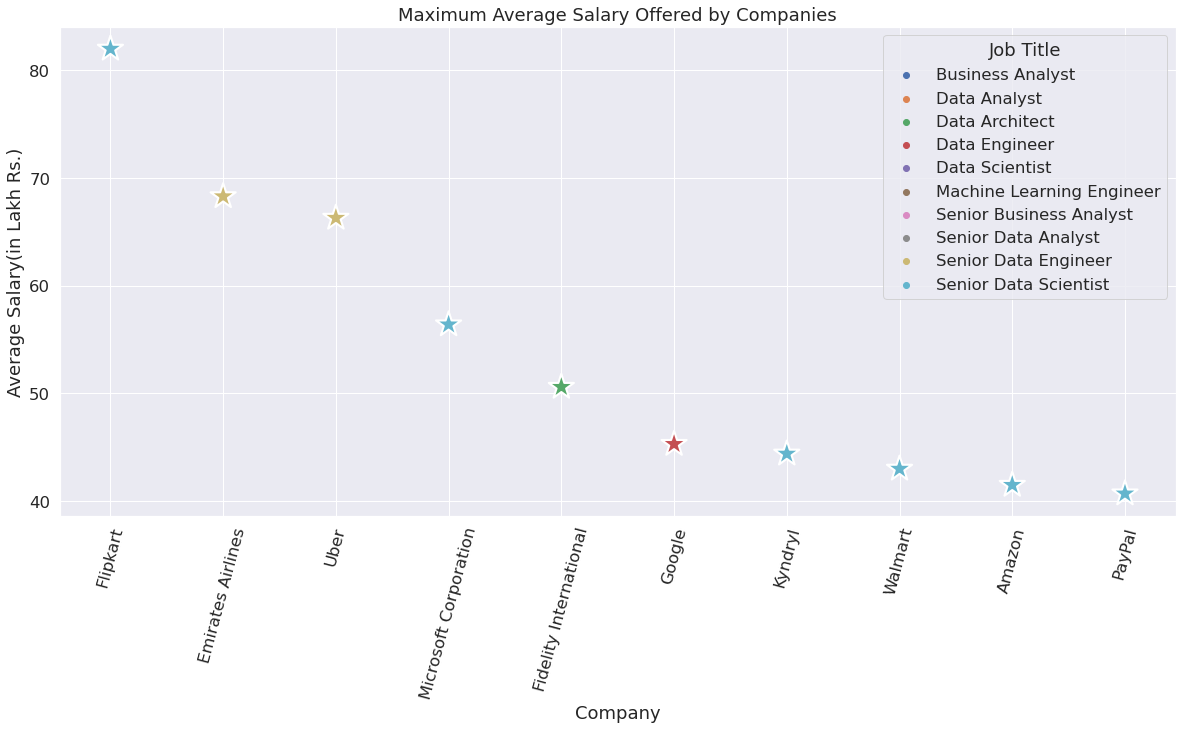

In [18]:
# Scatterplot
plt.figure(figsize =(20,9))

sns.set(font_scale= 1.5)
sns.scatterplot(x= "Company",y ="Avg_Salary(Lakh Rs.)",data = avg_salary, hue = "Job_Title",marker ="*",s = 700)

plt.legend(title='Team', fontsize="12", title_fontsize='14')
plt.ylabel("Average Salary(in Lakh Rs.)")
plt.title("Maximum Average Salary Offered by Companies")
plt.xticks(rotation = 75)
plt.legend(title="Job Title")

plt.show()

**b. Minimum and maximum average salaries as per job roles**

In [19]:
# Grouping by Job_Title, calculating and rounding off mean of specific columns values
avg_salary = df.groupby("Job_Title")[["Min_Salary(Lakh Rs.)","Max_Salary(Lakh Rs.)"]].mean().round().reset_index()
avg_salary

,Job_Title,Min_Salary(Lakh Rs.),Max_Salary(Lakh Rs.)
0,Business Analyst,5.0,14.0
1,Data Analyst,3.0,10.0
2,Data Architect,19.0,34.0
3,Data Engineer,7.0,18.0
4,Data Scientist,8.0,21.0
5,Machine Learning Engineer,7.0,14.0
6,Senior Business Analyst,8.0,19.0
7,Senior Data Analyst,6.0,13.0
8,Senior Data Engineer,13.0,25.0
9,Senior Data Scientist,16.0,30.0


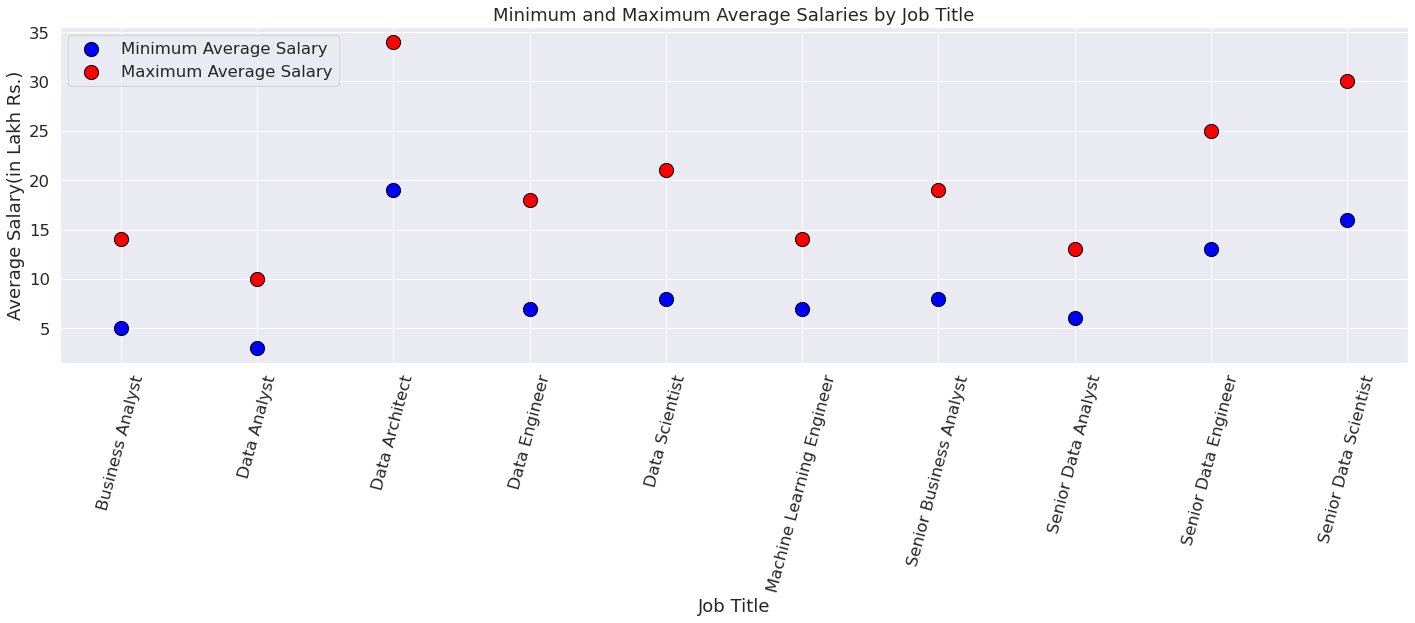

In [20]:
# Scatterplot
plt.figure(figsize =(20,9))
sns.set(font_scale= 1.5)
plt.scatter(x=avg_salary["Job_Title"],y=avg_salary['Min_Salary(Lakh Rs.)'],color ="blue",s=200,marker='o',edgecolor ="black",label ="Minimum Average Salary")
plt.scatter(x=avg_salary["Job_Title"],y=avg_salary['Max_Salary(Lakh Rs.)'],color ="red",s=200,marker='o',edgecolor ="black",label ="Maximum Average Salary")

plt.title('Minimum and Maximum Average Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary(in Lakh Rs.)')
plt.xticks(rotation = 75)
plt.legend(loc='best')
plt.tight_layout()
 
plt.show()

**c. Minimum and maximum salaries offered for entry-level position as per job title**

In [21]:
# Grouping by Job_Title and fetching minimum values of specific columns
junior_level = df.groupby("Job_Title")[["Min_Experience","Min_Salary(Lakh Rs.)","Max_Salary(Lakh Rs.)"]].min().reset_index()
junior_level

,Job_Title,Min_Experience,Min_Salary(Lakh Rs.),Max_Salary(Lakh Rs.)
0,Business Analyst,0,1.2,2.3
1,Data Analyst,0,0.2,2.0
2,Data Architect,3,7.5,16.1
3,Data Engineer,0,1.1,2.6
4,Data Scientist,0,2.0,6.0
5,Machine Learning Engineer,0,2.0,4.2
6,Senior Business Analyst,0,2.4,3.6
7,Senior Data Analyst,0,1.4,2.2
8,Senior Data Engineer,0,2.5,4.3
9,Senior Data Scientist,0,1.0,8.6


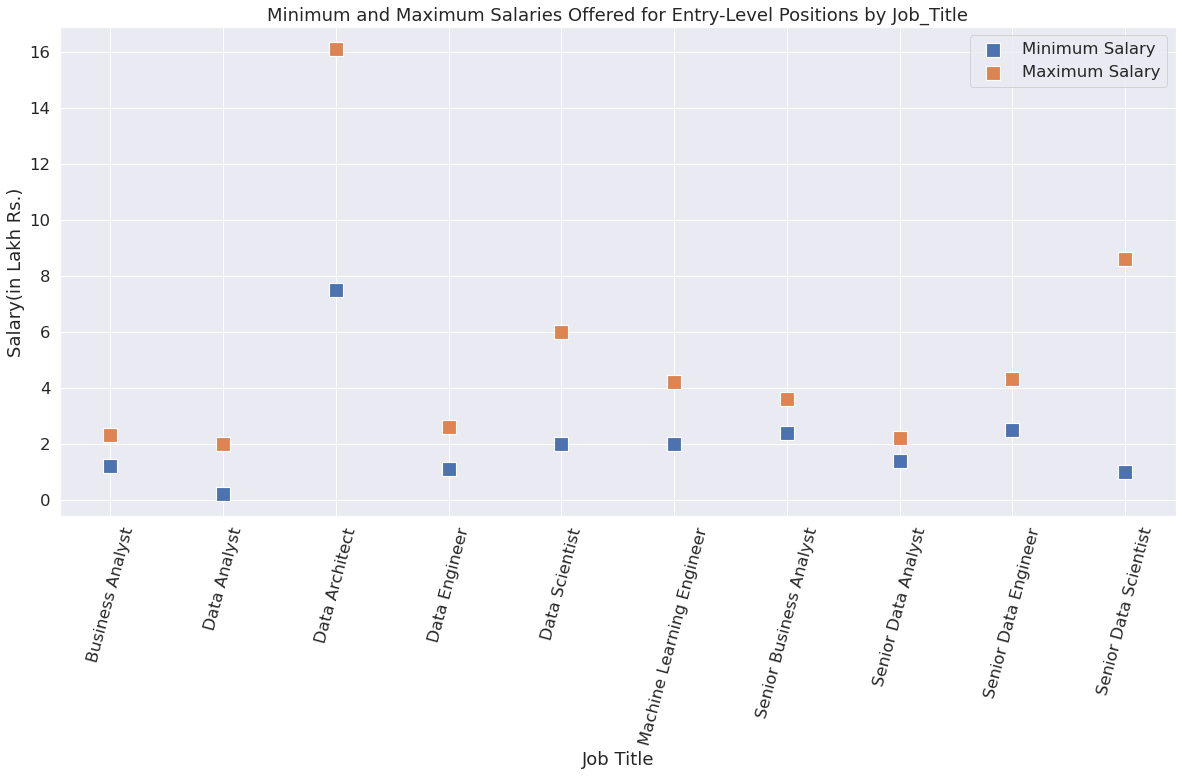

In [22]:
# Scatterplot
plt.figure(figsize=(20,9))
sns.set(font_scale= 1.5)
sns.scatterplot(x= "Job_Title",y="Min_Salary(Lakh Rs.)",data = junior_level,marker ="s",s = 200,label = "Minimum Salary")
sns.scatterplot(x= "Job_Title",y="Max_Salary(Lakh Rs.)",data = junior_level,marker ="s",s = 200,label = "Maximum Salary")
plt.title("Minimum and Maximum Salaries Offered for Entry-Level Positions by Job_Title")
plt.xlabel("Job Title")
plt.ylabel("Salary(in Lakh Rs.)")
plt.xticks(rotation =75)
plt.show()

**c. Minimum and maximum salaries offered for mid-level and senior-level positions as per job title**

In [23]:
# # Grouping by Job_Title and fetching maximum values of specific columns
senior_level = df.groupby("Job_Title")[["Min_Experience","Min_Salary(Lakh Rs.)","Max_Salary(Lakh Rs.)"]].max().reset_index()
senior_level

,Job_Title,Min_Experience,Min_Salary(Lakh Rs.),Max_Salary(Lakh Rs.)
0,Business Analyst,5,14.0,30.0
1,Data Analyst,3,9.0,50.0
2,Data Architect,21,33.6,102.0
3,Data Engineer,6,20.0,93.5
4,Data Scientist,5,20.0,74.5
5,Machine Learning Engineer,6,24.0,40.0
6,Senior Business Analyst,10,21.0,38.0
7,Senior Data Analyst,7,20.0,40.0
8,Senior Data Engineer,10,34.5,94.0
9,Senior Data Scientist,10,55.0,100.0


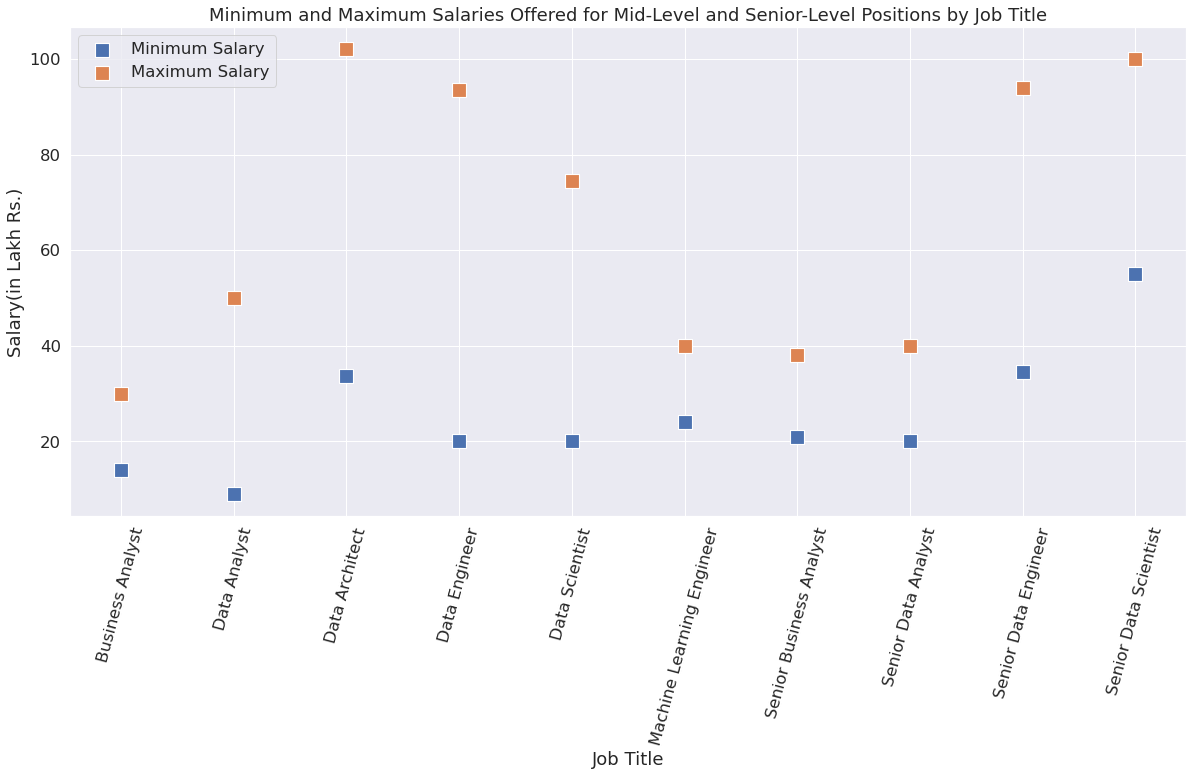

In [24]:
# Scatterplot
plt.figure(figsize=(20,9))
sns.set(font_scale= 1.5)
sns.scatterplot(x= "Job_Title",y="Min_Salary(Lakh Rs.)",data = senior_level,marker ="s",s = 200,label = "Minimum Salary")
sns.scatterplot(x= "Job_Title",y="Max_Salary(Lakh Rs.)",data = senior_level,marker ="s",s = 200,label = "Maximum Salary")
plt.title("Minimum and Maximum Salaries Offered for Mid-Level and Senior-Level Positions by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Salary(in Lakh Rs.)")
plt.xticks(rotation =75)
plt.show()
plt.show()

# 5. Asking and Answering Questions

**a. Which company is providing maximum salary for freshers by each job title?**

In [25]:
min_experience = df[df["Min_Experience"]==0]
group_experience = min_experience.groupby("Job_Title")["Company","Min_Experience","Max_Salary(Lakh Rs.)"].max().reset_index()
group_experience

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Job_Title,Company,Min_Experience,Max_Salary(Lakh Rs.)
0,Business Analyst,Veeraraghavan & Company,0.0,30.0
1,Data Analyst,eClerx,0.0,16.0
2,Data Architect,None,NaN,NaN
3,Data Engineer,Yash Technologies,0.0,40.0
4,Data Scientist,iNeuron.ai,0.0,42.0
5,Machine Learning Engineer,e-Zest,0.0,29.8
6,Senior Business Analyst,Unacademy,0.0,25.0
7,Senior Data Analyst,Zomato,0.0,10.5
8,Senior Data Engineer,Wavicle Data Solutions,0.0,15.6
9,Senior Data Scientist,HSBC,0.0,28.0


**b. Which company is providing maximum salary for mid to senior level positions( five and more than five years of job experience) by each job title?**

In [26]:
max_experience = df[df["Min_Experience"]>5]
group_experience = max_experience.groupby("Job_Title")["Company","Min_Experience","Max_Salary(Lakh Rs.)"].max().reset_index()
group_experience

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Job_Title,Company,Min_Experience,Max_Salary(Lakh Rs.)
0,Business Analyst,None,NaN,NaN
1,Data Analyst,None,NaN,NaN
2,Data Architect,Wipro,21.0,102.0
3,Data Engineer,Oil Field Instrumentation,6.0,11.1
4,Data Scientist,None,NaN,NaN
5,Machine Learning Engineer,Danaher,6.0,26.0
6,Senior Business Analyst,bnp paribas india solutions,10.0,36.0
7,Senior Data Analyst,Yash Technologies,7.0,22.3
8,Senior Data Engineer,Xpo Logistics,10.0,94.0
9,Senior Data Scientist,Xoriant,10.0,51.0


**c. Which companies are hiring for data architect profile?**

In [27]:
# Deploying query method to filter column values
data_architect = df.query("Job_Title=='Data Architect'").sort_values("Min_Experience")
data_architect

,Company,Job_Title,Min_Experience,Avg_Salary(Lakh Rs.),Min_Salary(Lakh Rs.),Max_Salary(Lakh Rs.),Salaries_Reported
1554,Fiserv,Data Architect,3,11.2,8.4,18.4,47
1558,Globant,Data Architect,4,21.2,15.5,32.0,21
1587,Webhelp,Data Architect,5,12.0,7.5,18.0,4
1579,Amdocs,Data Architect,5,12.5,9.9,16.1,5
1588,Bajaj Finserv,Data Architect,6,33.1,19.0,42.5,4
1598,Coforge,Data Architect,7,27.1,18.5,39.0,4
1592,Automatic Data Processing,Data Architect,7,36.5,14.0,102.0,4
1600,GE Power,Data Architect,7,16.7,14.9,19.0,3
1567,Genpact,Data Architect,7,26.1,15.0,37.0,7
1552,Accenture,Data Architect,8,24.6,15.8,33.0,55


In [28]:
len(data_architect)

50

**d. What are the most and least demanding data professional jobs in an Indian market?**

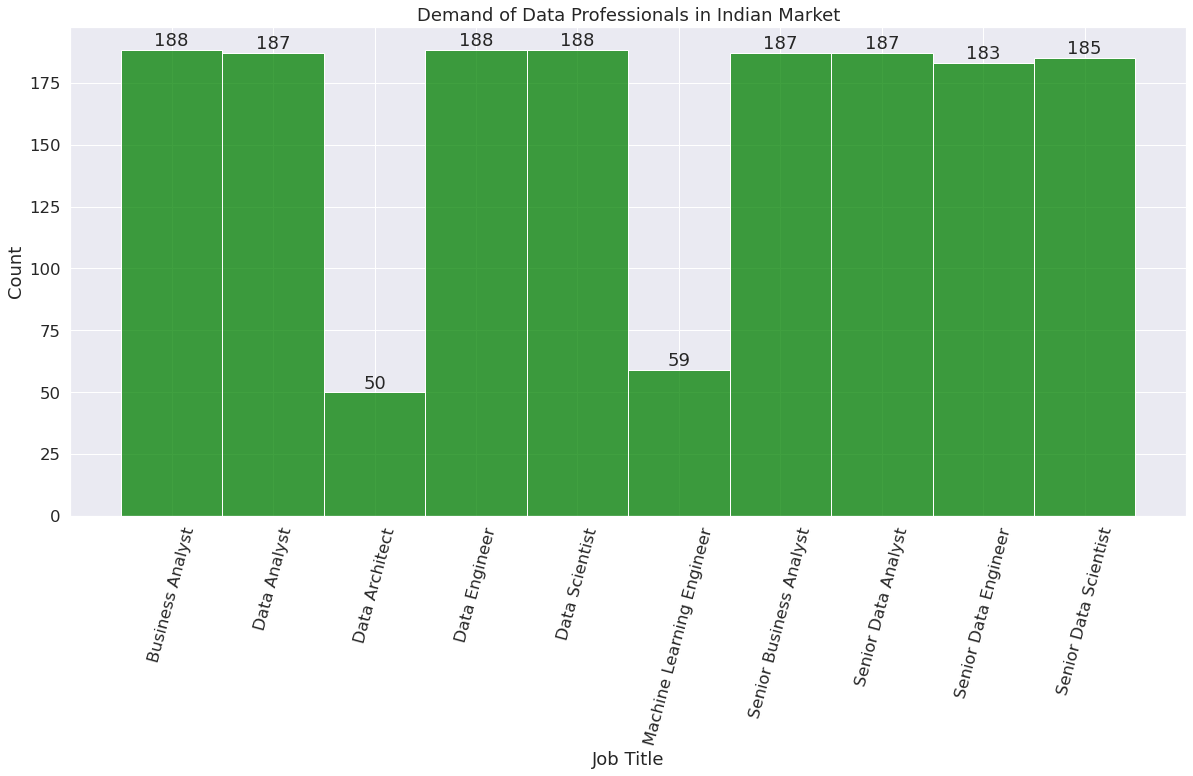

In [29]:
# Scatterplot
plt.figure(figsize =(20,9))
sns.set(font_scale= 1.5)
ax = sns.histplot(data = df,x ="Job_Title",color = "green")
ax.bar_label(ax.containers[0])
plt.title("Demand of Data Professionals in Indian Market")
plt.xlabel("Job Title")
plt.xticks(rotation=75)

plt.show()

**e. Categorize jobs into Entry, Mid and Senior Levels based on minimum experience required**

In [30]:
# User defined function
def category(x):
    if x<=5:
        return "Entry-Level"
    elif x>5 and x<10:
        return "Mid-Level"
    else:
        return "Senior-Level"

In [31]:
# Deploying .apply() method to apply criteria mentioned in user defined function category
df["Position"] = df["Min_Experience"].apply(category)

In [32]:
df

,Company,Job_Title,Min_Experience,Avg_Salary(Lakh Rs.),Min_Salary(Lakh Rs.),Max_Salary(Lakh Rs.),Salaries_Reported,Position
0,TCS,Data Scientist,2,7.8,4.5,16.0,841,Entry-Level
1,Accenture,Data Scientist,2,12.8,5.8,23.0,501,Entry-Level
2,IBM,Data Scientist,2,13.4,5.3,25.0,394,Entry-Level
3,Cognizant,Data Scientist,2,9.8,5.0,18.0,318,Entry-Level
4,Capgemini,Data Scientist,2,8.6,4.8,14.6,300,Entry-Level
...,...,...,...,...,...,...,...,...
1597,Collabera Technologies,Data Architect,8,17.0,12.0,23.1,4,Mid-Level
1598,Coforge,Data Architect,7,27.1,18.5,39.0,4,Mid-Level
1599,Hitachi,Data Architect,21,40.0,25.0,50.0,3,Senior-Level
1600,GE Power,Data Architect,7,16.7,14.9,19.0,3,Mid-Level


In [33]:
# Verifying results of apply() method for entry level positions by using .query() method
df.query("Job_Title =='Data Scientist' & Min_Experience <= 5")

,Company,Job_Title,Min_Experience,Avg_Salary(Lakh Rs.),Min_Salary(Lakh Rs.),Max_Salary(Lakh Rs.),Salaries_Reported,Position
0,TCS,Data Scientist,2,7.8,4.5,16.0,841,Entry-Level
1,Accenture,Data Scientist,2,12.8,5.8,23.0,501,Entry-Level
2,IBM,Data Scientist,2,13.4,5.3,25.0,394,Entry-Level
3,Cognizant,Data Scientist,2,9.8,5.0,18.0,318,Entry-Level
4,Capgemini,Data Scientist,2,8.6,4.8,14.6,300,Entry-Level
...,...,...,...,...,...,...,...,...
183,Morgan Stanley,Data Scientist,2,18.1,10.5,23.6,13,Entry-Level
184,Zee Entertainment Enterprises,Data Scientist,1,16.7,13.2,23.0,13,Entry-Level
185,Ola Cabs,Data Scientist,1,21.9,13.0,30.0,13,Entry-Level
186,NatWest Markets,Data Scientist,1,16.0,11.0,26.0,13,Entry-Level


In [34]:
# Verifying results of apply() method for mid level positions by using .between() method
df[df["Min_Experience"].between(6,9)]

,Company,Job_Title,Min_Experience,Avg_Salary(Lakh Rs.),Min_Salary(Lakh Rs.),Max_Salary(Lakh Rs.),Salaries_Reported,Position
682,Oil Field Instrumentation,Data Engineer,6,6.9,1.2,11.1,13,Mid-Level
769,Ericsson,Senior Data Scientist,7,30.2,14.2,50.6,22,Mid-Level
777,Wolters Kluwer,Senior Data Scientist,6,23.7,18.0,30.0,19,Mid-Level
789,DXC Technology,Senior Data Scientist,7,17.1,11.0,25.0,15,Mid-Level
790,PayPal,Senior Data Scientist,6,40.7,30.0,45.0,15,Mid-Level
...,...,...,...,...,...,...,...,...
1588,Bajaj Finserv,Data Architect,6,33.1,19.0,42.5,4,Mid-Level
1592,Automatic Data Processing,Data Architect,7,36.5,14.0,102.0,4,Mid-Level
1597,Collabera Technologies,Data Architect,8,17.0,12.0,23.1,4,Mid-Level
1598,Coforge,Data Architect,7,27.1,18.5,39.0,4,Mid-Level


In [35]:
# Verifying results of apply() method for senior level positions by using .query() method
df.query("Job_Title=='Data Architect'& Min_Experience >=10")

,Company,Job_Title,Min_Experience,Avg_Salary(Lakh Rs.),Min_Salary(Lakh Rs.),Max_Salary(Lakh Rs.),Salaries_Reported,Position
1555,IBM,Data Architect,10,19.6,13.5,29.0,44,Senior-Level
1556,Cognizant,Data Architect,10,19.6,15.0,25.5,42,Senior-Level
1559,Capgemini,Data Architect,10,22.6,16.0,32.0,19,Senior-Level
1560,Tech Mahindra,Data Architect,13,17.3,11.2,25.0,12,Senior-Level
1561,HCL Technologies,Data Architect,13,23.1,16.6,31.0,10,Senior-Level
1565,Infosys,Data Architect,13,19.8,11.9,32.0,8,Senior-Level
1569,Deloitte,Data Architect,11,27.6,21.2,32.3,6,Senior-Level
1570,PepsiCo,Data Architect,10,33.6,26.1,49.0,6,Senior-Level
1571,Anthology,Data Architect,11,25.5,25.0,26.3,6,Senior-Level
1572,DXC Technology,Data Architect,14,19.8,15.5,24.0,5,Senior-Level


# 6. Conclusions

**“The world’s most valuable resource is no longer oil, but data.”**
* In a developing country like India, there is a vast opportunity for large data-related activities, which requires data scientists, data analysts, business analysts, and data architects.According to the Harvard Business Review, Data Science is one of the sexiest jobs in 2023. Relevant skill sets and the cost of living in the city are the two most important factors which determine the payscale of data professionals.

Following facts can be inferred after the analysis of dataset:

* **Flipkart is offering a impressive maximum average salary 82 Lakh Rupees	for a position of Senior Data Scientist with an experience of five years**
* **Business analyst and data analyst roles requires relatively easy skillsets , therefore the minimum and maximum salaries offered for these positions are comparatively low than other job profiles**
* **Data architect and senior data scientist positions are being offered with massive minimum and maximum average salary ranges as compared to other job roles**
* **Data architects and senior data scientists are heavily paid employees for entry, mid and senior-level positions**
* **Wipro and Yash Technologies are offering a lucrative annual salary of more than 100 Lakh Rupees for data architect position with 21 years of experience and  senior data scientist position with 10 years of experience respectively**
* **Data scientist, data engineer, business analyst and data analyst are the top four fastest growing, successful and in-demand data professional jobs in an Indian market**  

# References

**Dataset:** 
* https://www.kaggle.com/datasets/madhurpant/data-science-jobs-in-india

**Histogram plot:**
* https://www.geeksforgeeks.org/how-to-make-histograms-with-density-plots-with-seaborn-histplot/
* https://kanoki.org/2022/07/02/matplotlib-add-value-labels-on-bar-chart-using-bar-label/ 

